<h3 style="font-weight: bold; text-align: center;">PRIMER PROYECTO INDIVIDUAL</h3>


Este proyecto tiene como objetivo analizar los datos de una plataforma de streaming, con el fin de crear un sistema de recomendación, empezando por un ETL que nos permita obtener datos más limpios y organizados para el respectivo analisis exploratorio de los datos EDA, que nos permita descubrir el significado de los mismos.

In [73]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [74]:
# Datos
df_movies = pd.read_pickle(r'C:\HENRY\PROYECTOS HENRY 11\Primer Proyecto Individual\Datasets\df_movies.pkl')
df_credits = pd.read_pickle(r'C:\HENRY\PROYECTOS HENRY 11\Primer Proyecto Individual\Datasets\newCredits1.pkl')


In [75]:
print(f"movies: {df_movies.shape}")
print(f"credits: {df_credits.shape}")

movies: (45463, 23)
credits: (41965, 3)


In [76]:
df_movies.head(3)

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,tagline,title,vote_average,vote_count,btc_id,btc_name,btc_poster_path,btc_backdrop_path,release_year,return
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,...,None,Toy Story,7.7,5415,10194.0,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,1995.0,12.451801
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,...,Roll the dice and unleash the excitement!,Jumanji,6.9,2413,NaN,NaN,NaN,NaN,1995.0,4.043035
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92,119050.0,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,1995.0,NaN


In [77]:
df_credits.head()

,id,Cast,directors
0,862,"[{'character': 'Woody (voice)', 'gender': 2, '...",[John Lasseter]
1,8844,"[{'character': 'Alan Parrish', 'gender': 2, 'i...",[Joe Johnston]
2,15602,"[{'character': 'Max Goldman', 'gender': 2, 'id...",[Howard Deutch]
3,31357,"[{'character': ''Savannah 'Vannah' Jackson'', ...",[Forest Whitaker]
4,11862,"[{'character': 'George Banks', 'gender': 2, 'i...",[Charles Shyer]


In [78]:
df_movies.columns

Index(['budget', 'genres', 'id', 'original_language', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'btc_id', 'btc_name', 'btc_poster_path',
       'btc_backdrop_path', 'release_year', 'return'],
      dtype='object')

In [79]:
df_movies.dtypes

budget                           int64
genres                          object
id                               int64
original_language               object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
btc_id                         float64
btc_name                        object
btc_poster_path                 object
btc_backdrop_path               object
release_year                   float64
return                         float64
dtype: object

In [81]:
df_movies.describe()

c:\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,budget,id,popularity,release_date,revenue,runtime,vote_average,vote_count,btc_id,release_year,return
count,4.546300e+04,45463.000000,45463.000000,45379,4.546300e+04,45206.000000,45463.000000,45463.000000,4491.000000,45379.000000,1.091700e+04
mean,4.224579e+06,108359.918813,2.921378,1992-05-16 02:18:40.324379136,1.120861e+07,94.127572,5.618217,109.890856,184108.678913,1991.882236,inf
min,0.000000e+00,2.000000,0.000000,1874-12-09 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,10.000000,1874.000000,0.000000e+00
25%,0.000000e+00,26449.500000,0.385945,1978-10-06 00:00:00,0.000000e+00,85.000000,5.000000,3.000000,86027.000000,1978.000000,0.000000e+00
50%,0.000000e+00,60003.000000,1.127757,2001-08-30 00:00:00,0.000000e+00,95.000000,6.000000,10.000000,141615.000000,2001.000000,1.273512e+00
75%,0.000000e+00,157328.000000,3.678588,2010-12-17 00:00:00,0.000000e+00,107.000000,6.800000,34.000000,294172.000000,2010.000000,7.266667e+00
max,3.800000e+08,469172.000000,547.488298,2020-12-16 00:00:00,2.787965e+09,1256.000000,10.000000,14075.000000,480160.000000,2020.000000,inf
std,1.742413e+07,112460.749278,6.005234,NaN,6.433019e+07,38.406803,1.924174,491.294816,141605.338687,24.054986,NaN


In [82]:
# Columnas adecuadas para el análisis
df_movies = df_movies[['budget', 'genres', 'id', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'title',
       'vote_average', 'vote_count', 'release_year', 'return']].copy()


In [ ]:
# De 23 columnas, nos quedamos con 16
df_movies.shape

(45463, 16)

In [84]:
df_movies.isna().sum()

budget                      0
genres                      0
id                          0
original_language          11
popularity                  0
production_companies        0
production_countries        0
release_date               84
revenue                     0
runtime                   257
spoken_languages            0
title                       0
vote_average                0
vote_count                  0
release_year               84
return                  34546
dtype: int64

Text(0.5, 0, 'Año de Lanzamiento')

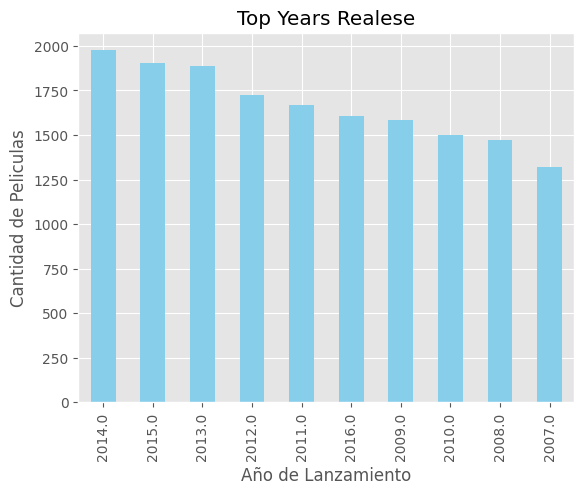

In [107]:
ax= df_movies['release_year'].value_counts() \
.head(10) \
.plot(kind='bar', title="Top Years Realese", color='skyblue')

ax.set_ylabel('Cantidad de Peliculas')
ax.set_xlabel('Año de Lanzamiento')


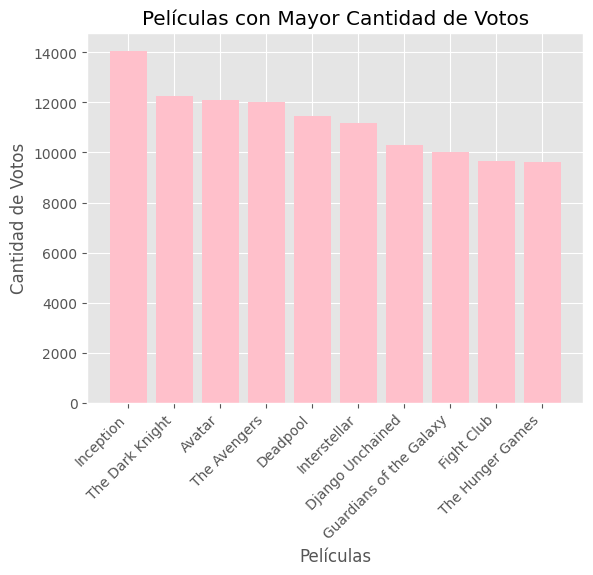

In [117]:
# Ordenar el DataFrame por la columna 'vote_count' en orden descendente
df_sorted = df_movies.sort_values(by='vote_count', ascending=False)

# Seleccionar las primeras 10 películas con más votos
top_movies = df_sorted.head(10)

# Crear el gráfico de barras
plt.bar(top_movies['title'], top_movies['vote_count'], color='pink')
plt.xlabel('Películas')
plt.ylabel('Cantidad de Votos')
plt.title('Películas con Mayor Cantidad de Votos')
plt.xticks(rotation=45, ha='right')
plt.show()

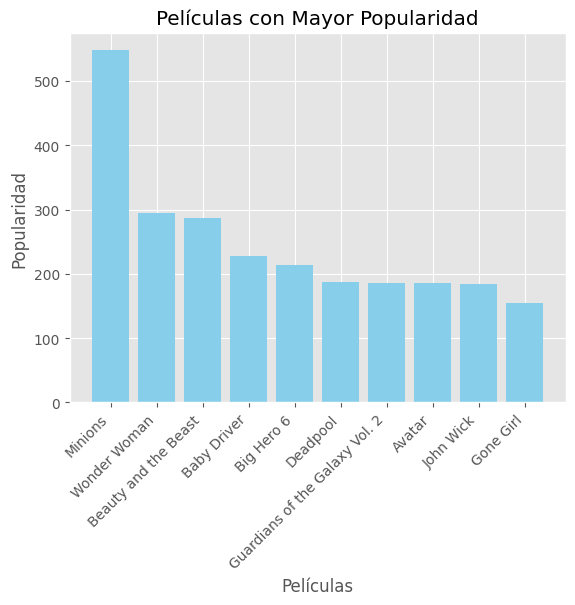

In [121]:
# Seleccionar las 10 películas más populares
top_popular_movies = df_movies.sort_values(by='popularity', ascending=False).head(10)

# Crear el gráfico de barras
plt.bar(top_popular_movies['title'], top_popular_movies['popularity'], color='skyblue')
plt.xlabel('Películas')
plt.ylabel('Popularidad')
plt.title('Películas con Mayor Popularidad')
plt.xticks(rotation=45, ha='right')
plt.show()


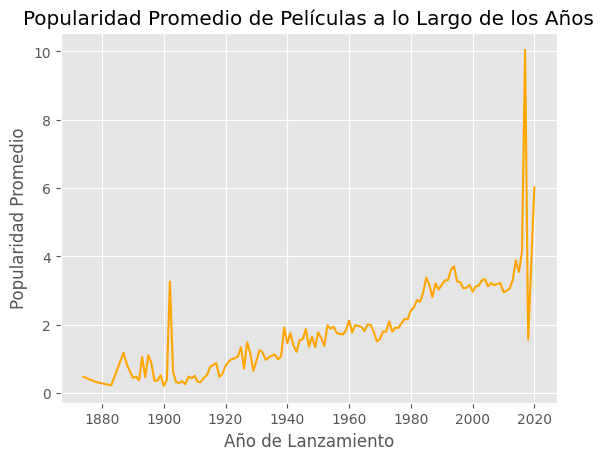

In [124]:
df_movies.groupby('release_year')['popularity'].mean().plot(kind='line', color='orange')
plt.title('Popularidad Promedio de Películas a lo Largo de los Años')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Popularidad Promedio')
plt.show()


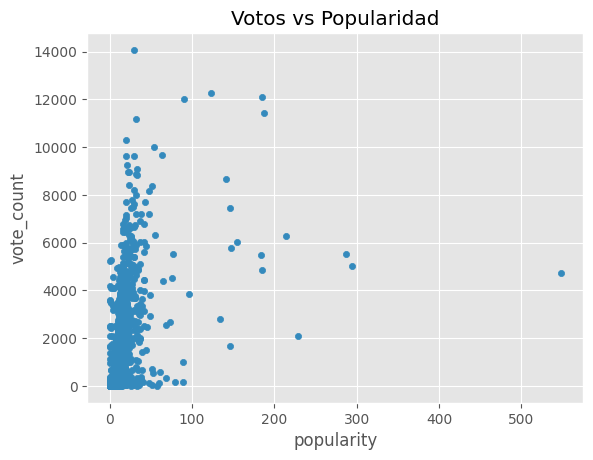

In [127]:
df_movies.plot(kind='scatter',
               x='popularity',
               y='vote_count',
               title="Votos vs Popularidad")
plt.show()

<Axes: xlabel='popularity', ylabel='vote_count'>

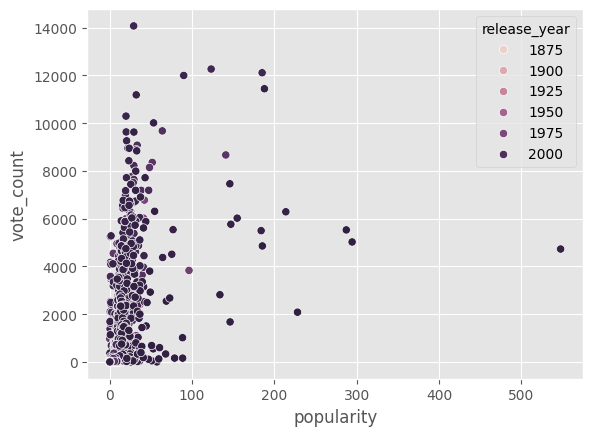

In [130]:
sns.scatterplot(x='popularity',
               y='vote_count',
               hue='release_year',
               data=df_movies
               )